In [1]:
from obspy import read
import wave

%matplotlib inline
data_url = 'http://opendap-devel.ooi.rutgers.edu:8080/opendap/hyrax/large_format/CE02SHBP-LJ01D-11-HYDBBA106/2015/12/16/OO-HYEA2--YDH-2015-12-16T02%3A20%3A00.000000.mseed'

We can open a stream directly from a URL using obspy.

In [2]:
stream = read(data_url)
stream

1 Trace(s) in Stream:
OO.HYEA2..YDH | 2015-12-16T02:20:00.000000Z - 2015-12-16T02:24:59.997984Z | 64000.0 Hz, 19199872 samples

We can see that this chunk of data contains 5 minutes worth of data collected at 64khz.

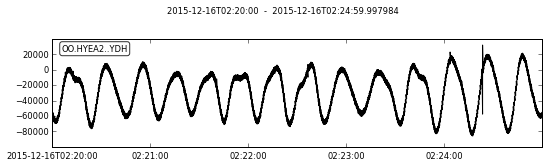

In [3]:
stream.plot()

This plot is dominated by very low frequency data. I'm going to filter that out.

In [4]:
trace = stream[0].copy()
trace.filter('highpass', freq=2.0)

OO.HYEA2..YDH | 2015-12-16T02:20:00.000000Z - 2015-12-16T02:24:59.997984Z | 64000.0 Hz, 19199872 samples

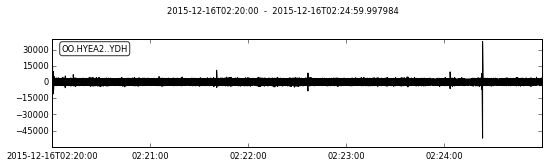

In [5]:
trace.plot()

Filtering converted the data to floating point. I'm going to normalize and cast as int32.

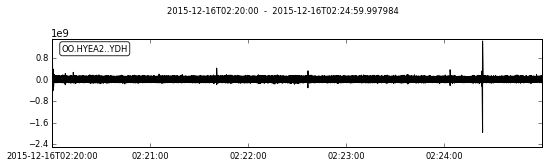

In [6]:
trace.normalize()
trace.data = (trace.data * (2**31-1)).astype('int32')
trace.plot()

In [7]:
trace.write('test.wav', format='WAV', framerate=64000)